## Prophet Docs ! 
출처 : https://facebook.github.io/prophet/docs/quick_start.html

In [ ]:
# Python
# pip install pandas 
# pip insatll prophet 
import pandas as pd
from prophet import Prophet

In [16]:
import prophet 
print(prophet.__version__)

1.1.6


In [20]:
# Python
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df

# ds 컬럼과 y 컬럼으로 이루어져 있음.

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [21]:
# 모델 훈련
model = Prophet()
model.fit(df)

14:17:05 - cmdstanpy - INFO - Chain [1] start processing
14:17:06 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
# 모델 예측 기간 설정하기
model_future=model.make_future_dataframe(periods=365)
model_future

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
...,...
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18


In [23]:
# 설정된 예측 기간에 대해서 예측해보기 
forecast = model.predict(model_future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.206964,7.476273,8.918714
3266,2017-01-16,8.531958,7.900247,9.330872
3267,2017-01-17,8.319376,7.614896,9.005386
3268,2017-01-18,8.151991,7.463372,8.892855
3269,2017-01-19,8.163908,7.472644,8.933996


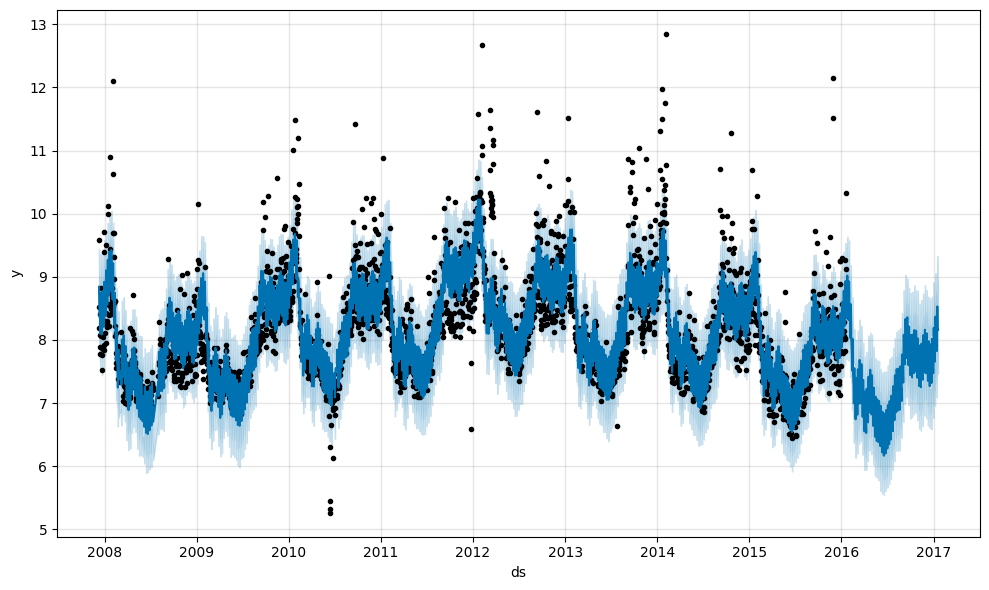

In [24]:
# Prophet에서 제공하는 플랏 
fig_plot = model.plot(forecast)

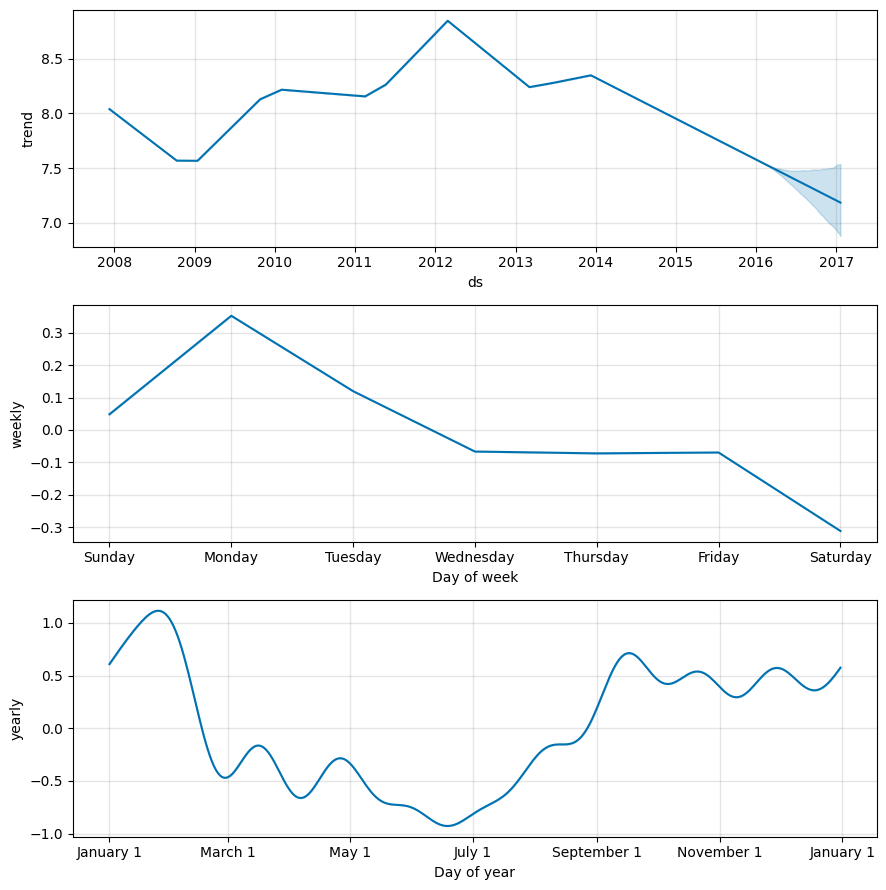

In [25]:
# 예측 구성 요소를 보고 싶다면, Prophet.plot_components 메서드를 사용할 수 있습니다.
# 기본적으로 해당 메서드를 실행하면 시간 시계열의 추세(trend), 연간 계절성(yearly seasonality), **주간 계절성(weekly seasonality)**이 표시됩니다.
# 만약 **공휴일(holidays)**을 포함하면, 그 영향을 보여주는 그래프도 함께 표시됩니다.
fig_components = model.plot_components(forecast)

In [26]:
# 예측 결과와 구성 요소를 인터랙티브한 그래프로 표시하려면 plotly를 사용할 수 있습니다.
# 하지만 prophet과 함께 기본적으로 설치되지 않으므로, 별도로 plotly 4.0 이상을 설치해야 합니다.
# 또한, Jupyter Notebook 환경에서 실행하려면 notebook 및 ipywidgets 패키지도 추가로 설치해야 합니다.

from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)
